In [1]:
from time import strftime, gmtime, localtime

import pandas as pd
import numpy as np

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV

import statsmodels.api as sm

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set(rc={'patch.edgecolor': 'w', 'patch.force_edgecolor': True, 'patch.linewidth': 1})
%matplotlib inline

random_state = 42
np.random.seed(random_state)

# run regularized models
# bring in S&P
# do RF, trees

In [2]:
data = pd.read_pickle("data.pickle")
data.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET
0,1963-02-28,T,10401,32,0.613024,-0.059701,0.99,99.788054,0.012821,-0.028852,-0.011157,0.017695
1,1963-02-28,GM,12079,23,0.408998,0.074757,0.99,99.788054,0.012821,-0.028852,-0.033865,-0.005013
2,1963-02-28,XOM,11850,30,0.686189,0.175562,0.99,99.788054,0.012821,-0.028852,0.006681,0.035533
3,1963-02-28,IBM,12490,34,0.126757,-0.275333,0.99,99.788054,0.012821,-0.028852,-0.054277,-0.025425
4,1963-02-28,DD,11703,14,0.336631,0.229181,0.99,99.788054,0.012821,-0.028852,-0.036623,-0.007771


In [3]:
X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
y = data["EXCESSRET"].values
X.shape, y.shape

((580693, 54), (580693,))

In [4]:
# create train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

Train R-squared: 0.002131


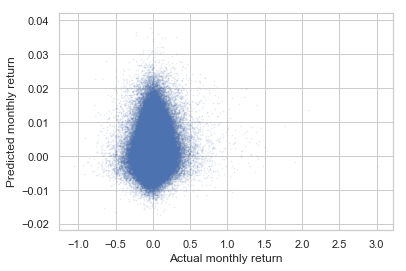

In [5]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Fitted vs. Actual
y_train_pred = model.predict(X_train)
print ("Train R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual monthly return");
plt.ylabel("Predicted monthly return");

In [6]:
# your predictions are bad and you should feel bad
# instead of predicting monthly, let's do 3 months


In [7]:
# this is possibly not the most efficient way to calculate 3-month returns

def group_by_permno(df, permno, col="RET"):
    retdf = df.loc[df['PERMNO']==permno]
    retdf["TPLUS1"] = retdf["DATETIME"].shift(-1)
    retdf[col + "1"] = retdf[col].shift(-1)
    retdf["TPLUS2"] = retdf["DATETIME"].shift(-2)
    retdf[col + "2"] = retdf[col].shift(-2)
    return retdf

group_by_permno(data, 12490, col="EXCESSRET")

/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET,TPLUS1,EXCESSRET1,TPLUS2,EXCESSRET2
3,1963-02-28,IBM,12490,34,0.126757,-0.275333,0.99,99.788054,0.012821,-0.028852,-0.054277,-0.025425,1963-03-31,0.017694,1963-04-30,0.053024
419,1963-03-31,IBM,12490,34,0.126757,-0.206399,0.92,99.939763,0.009615,0.035464,0.053158,0.017694,1963-04-30,0.053024,1963-05-31,0.016940
829,1963-04-30,IBM,12490,34,0.126757,-0.243486,1.00,100.074720,0.012821,0.048520,0.101544,0.053024,1963-05-31,0.016940,1963-06-30,-0.065711
1238,1963-05-31,IBM,12490,34,0.126757,-0.065072,1.04,100.184328,0.012780,0.014327,0.031267,0.016940,1963-06-30,-0.065711,1963-07-31,-0.000551
1641,1963-06-30,IBM,12490,34,0.126757,0.188960,1.07,100.262197,0.012780,-0.020198,-0.085909,-0.065711,1963-07-31,-0.000551,1963-08-31,-0.022857
2060,1963-07-31,IBM,12490,34,0.114340,0.418594,1.00,100.296671,0.009554,-0.003460,-0.004011,-0.000551,1963-08-31,-0.022857,1963-09-30,0.027336
2495,1963-08-31,IBM,12490,34,0.114340,0.136728,1.00,100.286099,0.012739,0.048749,0.025892,-0.022857,1963-09-30,0.027336,1963-10-31,0.060702
2944,1963-09-30,IBM,12490,34,0.114340,0.103650,0.84,100.247021,0.012739,-0.011035,0.016301,0.027336,1963-10-31,0.060702,1963-11-30,-0.004643
3407,1963-10-31,IBM,12490,34,0.114340,0.269149,0.68,100.204064,0.012698,0.032218,0.092920,0.060702,1963-11-30,-0.004643,1963-12-31,0.020379
3871,1963-11-30,IBM,12490,34,0.114340,0.317797,0.70,100.177771,0.012698,-0.010539,-0.015182,-0.004643,1963-12-31,0.020379,1964-01-31,0.042108


In [8]:
unique_permno = sorted(set(data["PERMNO"].values))

max_unique = len(unique_permno)

dflist = []
for i, permno in enumerate(unique_permno):
    if i%100==1:
        print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
    dflist.append(group_by_permno(data, permno, col="RET"))
print("concatenating")
datanew = pd.concat(dflist)

Grouping 10006 : item 0 of 5105
Grouping 10026 : item 1 of 5105


/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

Grouping 10032 : item 2 of 5105
Grouping 10048 : item 3 of 5105
Grouping 10071 : item 4 of 5105
Grouping 10075 : item 5 of 5105
Grouping 10078 : item 6 of 5105
Grouping 10085 : item 7 of 5105
Grouping 10095 : item 8 of 5105
Grouping 10102 : item 9 of 5105
Grouping 10104 : item 10 of 5105
Grouping 10107 : item 11 of 5105
Grouping 10108 : item 12 of 5105
Grouping 10114 : item 13 of 5105
Grouping 10119 : item 14 of 5105
Grouping 10126 : item 15 of 5105
Grouping 10137 : item 16 of 5105
Grouping 10138 : item 17 of 5105
Grouping 10143 : item 18 of 5105
Grouping 10145 : item 19 of 5105
Grouping 10147 : item 20 of 5105
Grouping 10153 : item 21 of 5105
Grouping 10161 : item 22 of 5105
Grouping 10180 : item 23 of 5105
Grouping 10182 : item 24 of 5105
Grouping 10188 : item 25 of 5105
Grouping 10199 : item 26 of 5105
Grouping 10211 : item 27 of 5105
Grouping 10213 : item 28 of 5105
Grouping 10220 : item 29 of 5105
Grouping 10225 : item 30 of 5105
Grouping 10233 : item 31 of 5105
Grouping 10241 : i

Grouping 12259 : item 248 of 5105
Grouping 12265 : item 249 of 5105
Grouping 12308 : item 250 of 5105
Grouping 12319 : item 251 of 5105
Grouping 12343 : item 252 of 5105
Grouping 12345 : item 253 of 5105
Grouping 12347 : item 254 of 5105
Grouping 12366 : item 255 of 5105
Grouping 12369 : item 256 of 5105
Grouping 12373 : item 257 of 5105
Grouping 12384 : item 258 of 5105
Grouping 12392 : item 259 of 5105
Grouping 12400 : item 260 of 5105
Grouping 12410 : item 261 of 5105
Grouping 12431 : item 262 of 5105
Grouping 12447 : item 263 of 5105
Grouping 12448 : item 264 of 5105
Grouping 12449 : item 265 of 5105
Grouping 12456 : item 266 of 5105
Grouping 12458 : item 267 of 5105
Grouping 12466 : item 268 of 5105
Grouping 12476 : item 269 of 5105
Grouping 12490 : item 270 of 5105
Grouping 12503 : item 271 of 5105
Grouping 12511 : item 272 of 5105
Grouping 12515 : item 273 of 5105
Grouping 12539 : item 274 of 5105
Grouping 12541 : item 275 of 5105
Grouping 12542 : item 276 of 5105
Grouping 12546

Grouping 14509 : item 489 of 5105
Grouping 14510 : item 490 of 5105
Grouping 14524 : item 491 of 5105
Grouping 14525 : item 492 of 5105
Grouping 14527 : item 493 of 5105
Grouping 14533 : item 494 of 5105
Grouping 14541 : item 495 of 5105
Grouping 14554 : item 496 of 5105
Grouping 14558 : item 497 of 5105
Grouping 14565 : item 498 of 5105
Grouping 14567 : item 499 of 5105
Grouping 14570 : item 500 of 5105
Grouping 14573 : item 501 of 5105
Grouping 14579 : item 502 of 5105
Grouping 14592 : item 503 of 5105
Grouping 14593 : item 504 of 5105
Grouping 14601 : item 505 of 5105
Grouping 14605 : item 506 of 5105
Grouping 14608 : item 507 of 5105
Grouping 14614 : item 508 of 5105
Grouping 14622 : item 509 of 5105
Grouping 14634 : item 510 of 5105
Grouping 14641 : item 511 of 5105
Grouping 14656 : item 512 of 5105
Grouping 14673 : item 513 of 5105
Grouping 14686 : item 514 of 5105
Grouping 14687 : item 515 of 5105
Grouping 14694 : item 516 of 5105
Grouping 14695 : item 517 of 5105
Grouping 14696

Grouping 18550 : item 731 of 5105
Grouping 18551 : item 732 of 5105
Grouping 18569 : item 733 of 5105
Grouping 18570 : item 734 of 5105
Grouping 18606 : item 735 of 5105
Grouping 18649 : item 736 of 5105
Grouping 18673 : item 737 of 5105
Grouping 18681 : item 738 of 5105
Grouping 18729 : item 739 of 5105
Grouping 18754 : item 740 of 5105
Grouping 18797 : item 741 of 5105
Grouping 18817 : item 742 of 5105
Grouping 18825 : item 743 of 5105
Grouping 18884 : item 744 of 5105
Grouping 18921 : item 745 of 5105
Grouping 18948 : item 746 of 5105
Grouping 18973 : item 747 of 5105
Grouping 18980 : item 748 of 5105
Grouping 18999 : item 749 of 5105
Grouping 19019 : item 750 of 5105
Grouping 19027 : item 751 of 5105
Grouping 19043 : item 752 of 5105
Grouping 19051 : item 753 of 5105
Grouping 19052 : item 754 of 5105
Grouping 19107 : item 755 of 5105
Grouping 19131 : item 756 of 5105
Grouping 19159 : item 757 of 5105
Grouping 19166 : item 758 of 5105
Grouping 19174 : item 759 of 5105
Grouping 19203

Grouping 23552 : item 973 of 5105
Grouping 23579 : item 974 of 5105
Grouping 23624 : item 975 of 5105
Grouping 23660 : item 976 of 5105
Grouping 23705 : item 977 of 5105
Grouping 23712 : item 978 of 5105
Grouping 23713 : item 979 of 5105
Grouping 23720 : item 980 of 5105
Grouping 23756 : item 981 of 5105
Grouping 23800 : item 982 of 5105
Grouping 23819 : item 983 of 5105
Grouping 23827 : item 984 of 5105
Grouping 23835 : item 985 of 5105
Grouping 23851 : item 986 of 5105
Grouping 23879 : item 987 of 5105
Grouping 23886 : item 988 of 5105
Grouping 23887 : item 989 of 5105
Grouping 23894 : item 990 of 5105
Grouping 23915 : item 991 of 5105
Grouping 23916 : item 992 of 5105
Grouping 23931 : item 993 of 5105
Grouping 23975 : item 994 of 5105
Grouping 23990 : item 995 of 5105
Grouping 24002 : item 996 of 5105
Grouping 24010 : item 997 of 5105
Grouping 24029 : item 998 of 5105
Grouping 24037 : item 999 of 5105
Grouping 24045 : item 1000 of 5105
Grouping 24046 : item 1001 of 5105
Grouping 240

Grouping 27756 : item 1208 of 5105
Grouping 27764 : item 1209 of 5105
Grouping 27780 : item 1210 of 5105
Grouping 27828 : item 1211 of 5105
Grouping 27836 : item 1212 of 5105
Grouping 27852 : item 1213 of 5105
Grouping 27860 : item 1214 of 5105
Grouping 27879 : item 1215 of 5105
Grouping 27887 : item 1216 of 5105
Grouping 27888 : item 1217 of 5105
Grouping 27895 : item 1218 of 5105
Grouping 27924 : item 1219 of 5105
Grouping 27940 : item 1220 of 5105
Grouping 27959 : item 1221 of 5105
Grouping 27983 : item 1222 of 5105
Grouping 27991 : item 1223 of 5105
Grouping 28089 : item 1224 of 5105
Grouping 28118 : item 1225 of 5105
Grouping 28134 : item 1226 of 5105
Grouping 28150 : item 1227 of 5105
Grouping 28169 : item 1228 of 5105
Grouping 28193 : item 1229 of 5105
Grouping 28222 : item 1230 of 5105
Grouping 28230 : item 1231 of 5105
Grouping 28265 : item 1232 of 5105
Grouping 28266 : item 1233 of 5105
Grouping 28310 : item 1234 of 5105
Grouping 28345 : item 1235 of 5105
Grouping 28346 : ite

Grouping 36978 : item 1444 of 5105
Grouping 36986 : item 1445 of 5105
Grouping 37007 : item 1446 of 5105
Grouping 37065 : item 1447 of 5105
Grouping 37102 : item 1448 of 5105
Grouping 37161 : item 1449 of 5105
Grouping 37189 : item 1450 of 5105
Grouping 37197 : item 1451 of 5105
Grouping 37234 : item 1452 of 5105
Grouping 37268 : item 1453 of 5105
Grouping 37284 : item 1454 of 5105
Grouping 37364 : item 1455 of 5105
Grouping 37461 : item 1456 of 5105
Grouping 37540 : item 1457 of 5105
Grouping 37584 : item 1458 of 5105
Grouping 37591 : item 1459 of 5105
Grouping 37663 : item 1460 of 5105
Grouping 37699 : item 1461 of 5105
Grouping 37744 : item 1462 of 5105
Grouping 37778 : item 1463 of 5105
Grouping 37807 : item 1464 of 5105
Grouping 37875 : item 1465 of 5105
Grouping 37955 : item 1466 of 5105
Grouping 38041 : item 1467 of 5105
Grouping 38093 : item 1468 of 5105
Grouping 38149 : item 1469 of 5105
Grouping 38156 : item 1470 of 5105
Grouping 38280 : item 1471 of 5105
Grouping 38287 : ite

Grouping 44273 : item 1680 of 5105
Grouping 44274 : item 1681 of 5105
Grouping 44310 : item 1682 of 5105
Grouping 44329 : item 1683 of 5105
Grouping 44337 : item 1684 of 5105
Grouping 44361 : item 1685 of 5105
Grouping 44409 : item 1686 of 5105
Grouping 44468 : item 1687 of 5105
Grouping 44485 : item 1688 of 5105
Grouping 44505 : item 1689 of 5105
Grouping 44506 : item 1690 of 5105
Grouping 44513 : item 1691 of 5105
Grouping 44548 : item 1692 of 5105
Grouping 44599 : item 1693 of 5105
Grouping 44601 : item 1694 of 5105
Grouping 44637 : item 1695 of 5105
Grouping 44644 : item 1696 of 5105
Grouping 44652 : item 1697 of 5105
Grouping 44708 : item 1698 of 5105
Grouping 44740 : item 1699 of 5105
Grouping 44759 : item 1700 of 5105
Grouping 44768 : item 1701 of 5105
Grouping 44783 : item 1702 of 5105
Grouping 44792 : item 1703 of 5105
Grouping 44812 : item 1704 of 5105
Grouping 44871 : item 1705 of 5105
Grouping 44935 : item 1706 of 5105
Grouping 44951 : item 1707 of 5105
Grouping 44986 : ite

Grouping 50227 : item 1916 of 5105
Grouping 50278 : item 1917 of 5105
Grouping 50286 : item 1918 of 5105
Grouping 50359 : item 1919 of 5105
Grouping 50404 : item 1920 of 5105
Grouping 50470 : item 1921 of 5105
Grouping 50550 : item 1922 of 5105
Grouping 50606 : item 1923 of 5105
Grouping 50666 : item 1924 of 5105
Grouping 50703 : item 1925 of 5105
Grouping 50710 : item 1926 of 5105
Grouping 50729 : item 1927 of 5105
Grouping 50737 : item 1928 of 5105
Grouping 50788 : item 1929 of 5105
Grouping 50825 : item 1930 of 5105
Grouping 50869 : item 1931 of 5105
Grouping 50876 : item 1932 of 5105
Grouping 50877 : item 1933 of 5105
Grouping 50885 : item 1934 of 5105
Grouping 50892 : item 1935 of 5105
Grouping 50905 : item 1936 of 5105
Grouping 50906 : item 1937 of 5105
Grouping 50948 : item 1938 of 5105
Grouping 50956 : item 1939 of 5105
Grouping 50964 : item 1940 of 5105
Grouping 50972 : item 1941 of 5105
Grouping 50980 : item 1942 of 5105
Grouping 51043 : item 1943 of 5105
Grouping 51086 : ite

Grouping 57357 : item 2152 of 5105
Grouping 57381 : item 2153 of 5105
Grouping 57437 : item 2154 of 5105
Grouping 57461 : item 2155 of 5105
Grouping 57488 : item 2156 of 5105
Grouping 57509 : item 2157 of 5105
Grouping 57533 : item 2158 of 5105
Grouping 57534 : item 2159 of 5105
Grouping 57568 : item 2160 of 5105
Grouping 57592 : item 2161 of 5105
Grouping 57605 : item 2162 of 5105
Grouping 57614 : item 2163 of 5105
Grouping 57648 : item 2164 of 5105
Grouping 57649 : item 2165 of 5105
Grouping 57665 : item 2166 of 5105
Grouping 57728 : item 2167 of 5105
Grouping 57744 : item 2168 of 5105
Grouping 57795 : item 2169 of 5105
Grouping 57808 : item 2170 of 5105
Grouping 57809 : item 2171 of 5105
Grouping 57816 : item 2172 of 5105
Grouping 57817 : item 2173 of 5105
Grouping 57840 : item 2174 of 5105
Grouping 57904 : item 2175 of 5105
Grouping 57912 : item 2176 of 5105
Grouping 57920 : item 2177 of 5105
Grouping 57947 : item 2178 of 5105
Grouping 57998 : item 2179 of 5105
Grouping 58018 : ite

Grouping 62711 : item 2387 of 5105
Grouping 62739 : item 2388 of 5105
Grouping 62770 : item 2389 of 5105
Grouping 62797 : item 2390 of 5105
Grouping 62818 : item 2391 of 5105
Grouping 62834 : item 2392 of 5105
Grouping 62842 : item 2393 of 5105
Grouping 62869 : item 2394 of 5105
Grouping 62877 : item 2395 of 5105
Grouping 62894 : item 2396 of 5105
Grouping 62949 : item 2397 of 5105
Grouping 63044 : item 2398 of 5105
Grouping 63060 : item 2399 of 5105
Grouping 63079 : item 2400 of 5105
Grouping 63088 : item 2401 of 5105
Grouping 63096 : item 2402 of 5105
Grouping 63108 : item 2403 of 5105
Grouping 63192 : item 2404 of 5105
Grouping 63255 : item 2405 of 5105
Grouping 63298 : item 2406 of 5105
Grouping 63343 : item 2407 of 5105
Grouping 63394 : item 2408 of 5105
Grouping 63467 : item 2409 of 5105
Grouping 63483 : item 2410 of 5105
Grouping 63554 : item 2411 of 5105
Grouping 63562 : item 2412 of 5105
Grouping 63685 : item 2413 of 5105
Grouping 63693 : item 2414 of 5105
Grouping 63707 : ite

Grouping 70578 : item 2623 of 5105
Grouping 70632 : item 2624 of 5105
Grouping 70659 : item 2625 of 5105
Grouping 70869 : item 2626 of 5105
Grouping 70923 : item 2627 of 5105
Grouping 70958 : item 2628 of 5105
Grouping 70965 : item 2629 of 5105
Grouping 71001 : item 2630 of 5105
Grouping 71116 : item 2631 of 5105
Grouping 71124 : item 2632 of 5105
Grouping 71175 : item 2633 of 5105
Grouping 71176 : item 2634 of 5105
Grouping 71204 : item 2635 of 5105
Grouping 71271 : item 2636 of 5105
Grouping 71298 : item 2637 of 5105
Grouping 71328 : item 2638 of 5105
Grouping 71563 : item 2639 of 5105
Grouping 71651 : item 2640 of 5105
Grouping 71678 : item 2641 of 5105
Grouping 71685 : item 2642 of 5105
Grouping 71686 : item 2643 of 5105
Grouping 71765 : item 2644 of 5105
Grouping 71830 : item 2645 of 5105
Grouping 71889 : item 2646 of 5105
Grouping 71909 : item 2647 of 5105
Grouping 71984 : item 2648 of 5105
Grouping 72005 : item 2649 of 5105
Grouping 72055 : item 2650 of 5105
Grouping 72056 : ite

Grouping 76201 : item 2858 of 5105
Grouping 76209 : item 2859 of 5105
Grouping 76214 : item 2860 of 5105
Grouping 76219 : item 2861 of 5105
Grouping 76224 : item 2862 of 5105
Grouping 76226 : item 2863 of 5105
Grouping 76230 : item 2864 of 5105
Grouping 76238 : item 2865 of 5105
Grouping 76240 : item 2866 of 5105
Grouping 76248 : item 2867 of 5105
Grouping 76263 : item 2868 of 5105
Grouping 76266 : item 2869 of 5105
Grouping 76270 : item 2870 of 5105
Grouping 76272 : item 2871 of 5105
Grouping 76282 : item 2872 of 5105
Grouping 76285 : item 2873 of 5105
Grouping 76290 : item 2874 of 5105
Grouping 76374 : item 2875 of 5105
Grouping 76383 : item 2876 of 5105
Grouping 76391 : item 2877 of 5105
Grouping 76477 : item 2878 of 5105
Grouping 76479 : item 2879 of 5105
Grouping 76489 : item 2880 of 5105
Grouping 76492 : item 2881 of 5105
Grouping 76497 : item 2882 of 5105
Grouping 76499 : item 2883 of 5105
Grouping 76504 : item 2884 of 5105
Grouping 76507 : item 2885 of 5105
Grouping 76512 : ite

Grouping 77606 : item 3094 of 5105
Grouping 77608 : item 3095 of 5105
Grouping 77610 : item 3096 of 5105
Grouping 77617 : item 3097 of 5105
Grouping 77634 : item 3098 of 5105
Grouping 77635 : item 3099 of 5105
Grouping 77637 : item 3100 of 5105
Grouping 77641 : item 3101 of 5105
Grouping 77643 : item 3102 of 5105
Grouping 77644 : item 3103 of 5105
Grouping 77649 : item 3104 of 5105
Grouping 77659 : item 3105 of 5105
Grouping 77660 : item 3106 of 5105
Grouping 77661 : item 3107 of 5105
Grouping 77662 : item 3108 of 5105
Grouping 77667 : item 3109 of 5105
Grouping 77668 : item 3110 of 5105
Grouping 77679 : item 3111 of 5105
Grouping 77695 : item 3112 of 5105
Grouping 77699 : item 3113 of 5105
Grouping 77702 : item 3114 of 5105
Grouping 77708 : item 3115 of 5105
Grouping 77712 : item 3116 of 5105
Grouping 77722 : item 3117 of 5105
Grouping 77730 : item 3118 of 5105
Grouping 77735 : item 3119 of 5105
Grouping 77746 : item 3120 of 5105
Grouping 77763 : item 3121 of 5105
Grouping 77768 : ite

Grouping 79550 : item 3329 of 5105
Grouping 79564 : item 3330 of 5105
Grouping 79568 : item 3331 of 5105
Grouping 79572 : item 3332 of 5105
Grouping 79588 : item 3333 of 5105
Grouping 79612 : item 3334 of 5105
Grouping 79616 : item 3335 of 5105
Grouping 79617 : item 3336 of 5105
Grouping 79628 : item 3337 of 5105
Grouping 79637 : item 3338 of 5105
Grouping 79641 : item 3339 of 5105
Grouping 79662 : item 3340 of 5105
Grouping 79667 : item 3341 of 5105
Grouping 79668 : item 3342 of 5105
Grouping 79672 : item 3343 of 5105
Grouping 79678 : item 3344 of 5105
Grouping 79683 : item 3345 of 5105
Grouping 79686 : item 3346 of 5105
Grouping 79698 : item 3347 of 5105
Grouping 79701 : item 3348 of 5105
Grouping 79718 : item 3349 of 5105
Grouping 79724 : item 3350 of 5105
Grouping 79730 : item 3351 of 5105
Grouping 79758 : item 3352 of 5105
Grouping 79764 : item 3353 of 5105
Grouping 79780 : item 3354 of 5105
Grouping 79781 : item 3355 of 5105
Grouping 79785 : item 3356 of 5105
Grouping 79788 : ite

Grouping 81262 : item 3564 of 5105
Grouping 81265 : item 3565 of 5105
Grouping 81266 : item 3566 of 5105
Grouping 81282 : item 3567 of 5105
Grouping 81284 : item 3568 of 5105
Grouping 81285 : item 3569 of 5105
Grouping 81290 : item 3570 of 5105
Grouping 81292 : item 3571 of 5105
Grouping 81293 : item 3572 of 5105
Grouping 81301 : item 3573 of 5105
Grouping 81469 : item 3574 of 5105
Grouping 81470 : item 3575 of 5105
Grouping 81472 : item 3576 of 5105
Grouping 81481 : item 3577 of 5105
Grouping 81482 : item 3578 of 5105
Grouping 81487 : item 3579 of 5105
Grouping 81501 : item 3580 of 5105
Grouping 81502 : item 3581 of 5105
Grouping 81506 : item 3582 of 5105
Grouping 81509 : item 3583 of 5105
Grouping 81519 : item 3584 of 5105
Grouping 81523 : item 3585 of 5105
Grouping 81530 : item 3586 of 5105
Grouping 81539 : item 3587 of 5105
Grouping 81540 : item 3588 of 5105
Grouping 81541 : item 3589 of 5105
Grouping 81548 : item 3590 of 5105
Grouping 81564 : item 3591 of 5105
Grouping 81577 : ite

Grouping 83358 : item 3799 of 5105
Grouping 83366 : item 3800 of 5105
Grouping 83367 : item 3801 of 5105
Grouping 83386 : item 3802 of 5105
Grouping 83392 : item 3803 of 5105
Grouping 83399 : item 3804 of 5105
Grouping 83400 : item 3805 of 5105
Grouping 83403 : item 3806 of 5105
Grouping 83405 : item 3807 of 5105
Grouping 83413 : item 3808 of 5105
Grouping 83421 : item 3809 of 5105
Grouping 83422 : item 3810 of 5105
Grouping 83431 : item 3811 of 5105
Grouping 83435 : item 3812 of 5105
Grouping 83439 : item 3813 of 5105
Grouping 83440 : item 3814 of 5105
Grouping 83443 : item 3815 of 5105
Grouping 83447 : item 3816 of 5105
Grouping 83448 : item 3817 of 5105
Grouping 83452 : item 3818 of 5105
Grouping 83453 : item 3819 of 5105
Grouping 83455 : item 3820 of 5105
Grouping 83459 : item 3821 of 5105
Grouping 83462 : item 3822 of 5105
Grouping 83464 : item 3823 of 5105
Grouping 83471 : item 3824 of 5105
Grouping 83480 : item 3825 of 5105
Grouping 83509 : item 3826 of 5105
Grouping 83531 : ite

Grouping 84792 : item 4034 of 5105
Grouping 84794 : item 4035 of 5105
Grouping 84817 : item 4036 of 5105
Grouping 84827 : item 4037 of 5105
Grouping 84836 : item 4038 of 5105
Grouping 84997 : item 4039 of 5105
Grouping 85002 : item 4040 of 5105
Grouping 85010 : item 4041 of 5105
Grouping 85011 : item 4042 of 5105
Grouping 85025 : item 4043 of 5105
Grouping 85026 : item 4044 of 5105
Grouping 85032 : item 4045 of 5105
Grouping 85033 : item 4046 of 5105
Grouping 85035 : item 4047 of 5105
Grouping 85041 : item 4048 of 5105
Grouping 85043 : item 4049 of 5105
Grouping 85050 : item 4050 of 5105
Grouping 85067 : item 4051 of 5105
Grouping 85072 : item 4052 of 5105
Grouping 85073 : item 4053 of 5105
Grouping 85077 : item 4054 of 5105
Grouping 85080 : item 4055 of 5105
Grouping 85085 : item 4056 of 5105
Grouping 85160 : item 4057 of 5105
Grouping 85168 : item 4058 of 5105
Grouping 85173 : item 4059 of 5105
Grouping 85182 : item 4060 of 5105
Grouping 85192 : item 4061 of 5105
Grouping 85196 : ite

Grouping 86356 : item 4269 of 5105
Grouping 86360 : item 4270 of 5105
Grouping 86363 : item 4271 of 5105
Grouping 86368 : item 4272 of 5105
Grouping 86372 : item 4273 of 5105
Grouping 86381 : item 4274 of 5105
Grouping 86401 : item 4275 of 5105
Grouping 86408 : item 4276 of 5105
Grouping 86411 : item 4277 of 5105
Grouping 86414 : item 4278 of 5105
Grouping 86418 : item 4279 of 5105
Grouping 86420 : item 4280 of 5105
Grouping 86432 : item 4281 of 5105
Grouping 86437 : item 4282 of 5105
Grouping 86445 : item 4283 of 5105
Grouping 86447 : item 4284 of 5105
Grouping 86448 : item 4285 of 5105
Grouping 86496 : item 4286 of 5105
Grouping 86498 : item 4287 of 5105
Grouping 86519 : item 4288 of 5105
Grouping 86525 : item 4289 of 5105
Grouping 86540 : item 4290 of 5105
Grouping 86542 : item 4291 of 5105
Grouping 86544 : item 4292 of 5105
Grouping 86547 : item 4293 of 5105
Grouping 86560 : item 4294 of 5105
Grouping 86565 : item 4295 of 5105
Grouping 86569 : item 4296 of 5105
Grouping 86572 : ite

Grouping 87632 : item 4504 of 5105
Grouping 87633 : item 4505 of 5105
Grouping 87644 : item 4506 of 5105
Grouping 87657 : item 4507 of 5105
Grouping 87659 : item 4508 of 5105
Grouping 87660 : item 4509 of 5105
Grouping 87666 : item 4510 of 5105
Grouping 87696 : item 4511 of 5105
Grouping 87717 : item 4512 of 5105
Grouping 87785 : item 4513 of 5105
Grouping 87800 : item 4514 of 5105
Grouping 87812 : item 4515 of 5105
Grouping 87825 : item 4516 of 5105
Grouping 87831 : item 4517 of 5105
Grouping 87841 : item 4518 of 5105
Grouping 87842 : item 4519 of 5105
Grouping 87952 : item 4520 of 5105
Grouping 88031 : item 4521 of 5105
Grouping 88152 : item 4522 of 5105
Grouping 88155 : item 4523 of 5105
Grouping 88159 : item 4524 of 5105
Grouping 88172 : item 4525 of 5105
Grouping 88178 : item 4526 of 5105
Grouping 88182 : item 4527 of 5105
Grouping 88190 : item 4528 of 5105
Grouping 88196 : item 4529 of 5105
Grouping 88197 : item 4530 of 5105
Grouping 88198 : item 4531 of 5105
Grouping 88199 : ite

Grouping 89900 : item 4740 of 5105
Grouping 89901 : item 4741 of 5105
Grouping 89904 : item 4742 of 5105
Grouping 89908 : item 4743 of 5105
Grouping 89911 : item 4744 of 5105
Grouping 89916 : item 4745 of 5105
Grouping 89918 : item 4746 of 5105
Grouping 89922 : item 4747 of 5105
Grouping 89952 : item 4748 of 5105
Grouping 89954 : item 4749 of 5105
Grouping 89957 : item 4750 of 5105
Grouping 89960 : item 4751 of 5105
Grouping 89965 : item 4752 of 5105
Grouping 89971 : item 4753 of 5105
Grouping 89976 : item 4754 of 5105
Grouping 89977 : item 4755 of 5105
Grouping 90009 : item 4756 of 5105
Grouping 90011 : item 4757 of 5105
Grouping 90022 : item 4758 of 5105
Grouping 90037 : item 4759 of 5105
Grouping 90038 : item 4760 of 5105
Grouping 90044 : item 4761 of 5105
Grouping 90045 : item 4762 of 5105
Grouping 90052 : item 4763 of 5105
Grouping 90055 : item 4764 of 5105
Grouping 90071 : item 4765 of 5105
Grouping 90090 : item 4766 of 5105
Grouping 90100 : item 4767 of 5105
Grouping 90110 : ite

Grouping 91915 : item 4975 of 5105
Grouping 91926 : item 4976 of 5105
Grouping 91937 : item 4977 of 5105
Grouping 91967 : item 4978 of 5105
Grouping 91968 : item 4979 of 5105
Grouping 91971 : item 4980 of 5105
Grouping 91975 : item 4981 of 5105
Grouping 91976 : item 4982 of 5105
Grouping 91977 : item 4983 of 5105
Grouping 91983 : item 4984 of 5105
Grouping 92018 : item 4985 of 5105
Grouping 92021 : item 4986 of 5105
Grouping 92034 : item 4987 of 5105
Grouping 92043 : item 4988 of 5105
Grouping 92044 : item 4989 of 5105
Grouping 92050 : item 4990 of 5105
Grouping 92092 : item 4991 of 5105
Grouping 92095 : item 4992 of 5105
Grouping 92096 : item 4993 of 5105
Grouping 92102 : item 4994 of 5105
Grouping 92104 : item 4995 of 5105
Grouping 92121 : item 4996 of 5105
Grouping 92132 : item 4997 of 5105
Grouping 92156 : item 4998 of 5105
Grouping 92157 : item 4999 of 5105
Grouping 92188 : item 5000 of 5105
Grouping 92191 : item 5001 of 5105
Grouping 92203 : item 5002 of 5105
Grouping 92215 : ite

In [9]:
datanew.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET,TPLUS1,RET1,TPLUS2,RET2
327,1963-02-28,ACF,10006,25,1.443624,0.096012,0.99,99.788054,0.012821,-0.028852,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848
735,1963-03-31,ACF,10006,25,1.443624,0.133934,0.92,99.939763,0.009615,0.035464,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620
1151,1963-04-30,ACF,10006,25,1.443624,0.268752,1.00,100.074720,0.012821,0.048520,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289
1555,1963-05-31,ACF,10006,25,1.443624,0.189535,1.04,100.184328,0.012780,0.014327,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161
1947,1963-06-30,ACF,10006,25,1.443624,0.536269,1.07,100.262197,0.012780,-0.020198,-0.001289,0.018909,1963-07-31,-0.045161,1963-08-31,0.121081


In [11]:

dflist = []
for i, permno in enumerate(unique_permno):
    if i%100==1:
        print("%s Grouping %d : item %d of %d" % (strftime("%Y-%m-%d %H:%M:%S", localtime()), permno, i-1, max_unique))
    dflist.append(group_by_permno(datanew, permno, col="EXCESSRET"))
print("concatenating")
datanew = pd.concat(dflist)

datanew.head()

/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/druce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

2018-10-10 19:54:00 Grouping 10026 : item 0 of 5105
2018-10-10 19:54:12 Grouping 10890 : item 100 of 5105
2018-10-10 19:54:26 Grouping 11850 : item 200 of 5105
2018-10-10 19:54:38 Grouping 12796 : item 300 of 5105
2018-10-10 19:54:52 Grouping 13711 : item 400 of 5105
2018-10-10 19:55:04 Grouping 14573 : item 500 of 5105
2018-10-10 19:55:18 Grouping 15560 : item 600 of 5105
2018-10-10 19:55:31 Grouping 17815 : item 700 of 5105
2018-10-10 19:55:44 Grouping 20095 : item 800 of 5105
2018-10-10 19:55:57 Grouping 22243 : item 900 of 5105
2018-10-10 19:56:11 Grouping 24046 : item 1000 of 5105
2018-10-10 19:56:26 Grouping 25689 : item 1100 of 5105
2018-10-10 19:56:43 Grouping 27676 : item 1200 of 5105
2018-10-10 19:57:01 Grouping 31131 : item 1300 of 5105
2018-10-10 19:57:18 Grouping 35370 : item 1400 of 5105
2018-10-10 19:57:35 Grouping 39045 : item 1500 of 5105
2018-10-10 19:57:53 Grouping 41929 : item 1600 of 5105
2018-10-10 19:58:10 Grouping 44768 : item 1700 of 5105
2018-10-10 19:58:29 Gr

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET,TPLUS1,RET1,TPLUS2,RET2,EXCESSRET1,EXCESSRET2
327,1963-02-28,ACF,10006,25,1.443624,0.096012,0.99,99.788054,0.012821,-0.028852,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848,-0.044473,0.036328
735,1963-03-31,ACF,10006,25,1.443624,0.133934,0.92,99.939763,0.009615,0.035464,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620,0.036328,0.077293
1151,1963-04-30,ACF,10006,25,1.443624,0.268752,1.00,100.074720,0.012821,0.048520,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289,0.077293,0.018909
1555,1963-05-31,ACF,10006,25,1.443624,0.189535,1.04,100.184328,0.012780,0.014327,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161,0.018909,-0.041701
1947,1963-06-30,ACF,10006,25,1.443624,0.536269,1.07,100.262197,0.012780,-0.020198,-0.001289,0.018909,1963-07-31,-0.045161,1963-08-31,0.121081,-0.041701,0.072332


In [12]:
print(datanew.shape)
datanew = datanew.dropna()
print(datanew.shape)


(580693, 18)
(570621, 18)


In [13]:
datanew["RET3"]= (1 + datanew["RET"]) * (1 + datanew["RET1"]) * (1 + datanew["RET2"]) -1
datanew["EXCESSRET3"]= (1 + datanew["EXCESSRET"]) * (1 + datanew["EXCESSRET1"]) * (1 + datanew["EXCESSRET2"]) -1
datanew.head()


,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,SP500TR,RET,EXCESSRET,TPLUS1,RET1,TPLUS2,RET2,EXCESSRET1,EXCESSRET2,RET3,EXCESSRET3
327,1963-02-28,ACF,10006,25,1.443624,0.096012,0.99,99.788054,0.012821,-0.028852,0.038700,0.067552,1963-03-31,-0.009009,1963-04-30,0.084848,-0.044473,0.036328,0.116680,0.057131
735,1963-03-31,ACF,10006,25,1.443624,0.133934,0.92,99.939763,0.009615,0.035464,-0.009009,-0.044473,1963-04-30,0.084848,1963-05-31,0.091620,0.036328,0.077293,0.173573,0.066778
1151,1963-04-30,ACF,10006,25,1.443624,0.268752,1.00,100.074720,0.012821,0.048520,0.084848,0.036328,1963-05-31,0.091620,1963-06-30,-0.001289,0.077293,0.018909,0.182715,0.137539
1555,1963-05-31,ACF,10006,25,1.443624,0.189535,1.04,100.184328,0.012780,0.014327,0.091620,0.077293,1963-06-30,-0.001289,1963-07-31,-0.045161,0.018909,-0.041701,0.040978,0.051890
1947,1963-06-30,ACF,10006,25,1.443624,0.536269,1.07,100.262197,0.012780,-0.020198,-0.001289,0.018909,1963-07-31,-0.045161,1963-08-31,0.121081,-0.041701,0.072332,0.069072,0.047046


In [14]:
data = datanew[['DATETIME', 'SYMBOL', 'PERMNO', 'INDUSTRY', 
                'VALUE', 'MOMENTUM','MONETARYPOLICY', 'GROWTH', 'INFLATION',
                'RET', 'RET3', 'EXCESSRET', 'EXCESSRET3']]
data.to_pickle("data3.pickle")
data.head()

,DATETIME,SYMBOL,PERMNO,INDUSTRY,VALUE,MOMENTUM,MONETARYPOLICY,GROWTH,INFLATION,RET,RET3,EXCESSRET,EXCESSRET3
327,1963-02-28,ACF,10006,25,1.443624,0.096012,0.99,99.788054,0.012821,0.038700,0.116680,0.067552,0.057131
735,1963-03-31,ACF,10006,25,1.443624,0.133934,0.92,99.939763,0.009615,-0.009009,0.173573,-0.044473,0.066778
1151,1963-04-30,ACF,10006,25,1.443624,0.268752,1.00,100.074720,0.012821,0.084848,0.182715,0.036328,0.137539
1555,1963-05-31,ACF,10006,25,1.443624,0.189535,1.04,100.184328,0.012780,0.091620,0.040978,0.077293,0.051890
1947,1963-06-30,ACF,10006,25,1.443624,0.536269,1.07,100.262197,0.012780,-0.001289,0.069072,0.018909,0.047046
2374,1963-07-31,ACF,10006,25,0.955148,0.698340,1.00,100.296671,0.009554,-0.045161,-0.012690,-0.041701,-0.040861
2833,1963-08-31,ACF,10006,25,0.955148,0.482562,1.00,100.286099,0.012739,0.121081,0.093870,0.072332,0.026577
3278,1963-09-30,ACF,10006,25,0.955148,0.410384,0.84,100.247021,0.012739,-0.077670,0.216505,-0.066635,0.203657
3746,1963-10-31,ACF,10006,25,0.955148,0.671417,0.68,100.204064,0.012698,0.057895,0.313651,0.025677,0.252888
4202,1963-11-30,ACF,10006,25,0.955148,0.439581,0.70,100.177771,0.012698,0.246766,0.326879,0.257305,0.272365


In [15]:
%time data = pd.read_pickle("data3.pickle")


CPU times: user 53.8 ms, sys: 89.6 ms, total: 143 ms
Wall time: 212 ms


In [16]:
# create X and y numpy arrays

X = data[["VALUE","MOMENTUM","MONETARYPOLICY","GROWTH","INFLATION"]].values
#X = data[["VALUE", "MOMENTUM"]].values
X = np.hstack((X, pd.get_dummies(data["INDUSTRY"]).values))
# use 3-month returns
y = data["EXCESSRET3"].values
X.shape, y.shape

((570621, 54), (570621,))

In [17]:
# split and scale for future regularization experiments
# note that holding out random rows is problematic for time series
# should use walkforward cross-validation 
# even then resulting metrics should be viewed with suspicion

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)
# scale
scaler = preprocessing.StandardScaler()
# train scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
# apply to test data
X_test_scaled = scaler.transform(X_test)



In [18]:
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

model = sm.OLS(y_train, X_train_scaled_const)
results = model.fit()

y_train_predict = results.predict(X_train_scaled_const).reshape(y_train.shape)
residuals = y_train - y_train_predict

print("Prediction mean: %.6f" % np.mean(y_train_predict))
print("Prediction SD:   %.6f" % np.mean(np.std(y_train_predict)))

results.summary()

Prediction mean: 0.007378
Prediction SD:   0.011896


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     56.17
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        20:11:58   Log-Likelihood:             2.2467e+05
No. Observations:              513558   AIC:                        -4.492e+05
Df Residuals:                  513504   BIC:                        -4.486e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.000     33.842      0.000       0.007       0.008
x1             0.0075      0.000     29.034      0.000       0.007       0.008
x2             0.0061      0.000     27.426      0.000       0.006       0.007
x3            -0.0008      0.000     -3.624      0.000      -0.001      -0.000
x4            -0.0049      0.000    -20.906      0.000      -0.005      -0.004
x5             0.0028      0.000     10.907      0.000       0.002       0.003
x6             0.0007      0.000      3.012      0.003       0.000       0.001
x7            -0.0003      0.000     -1.541      0.123      -0.001    9.11e-05
x8             0.0009      0.000      4.005      0.000       0.000       0.001
x9             0.0008      0.000      3.705      0.000       0.000       0.001
x10            0.0003      0.000      1.524      0.127   -9.44e-05       0.001
x11            0.0013      0.000      6.073      0.000       0.001       0.002
x12           -0.0005      0.000     -2.089      0.037      -0.001    -2.8e-05
x13            0.0008      0.000      3.499      0.000       0.000       0.001
x14            0.0001      0.000      0.569      0.569      -0.000       0.001
x15         2.953e-05      0.000      0.138      0.890      -0.000       0.000
x16           -0.0002      0.000     -1.070      0.285      -0.001       0.000
x17           -0.0002      0.000     -1.135      0.256      -0.001       0.000
x18            0.0009      0.000      4.343      0.000       0.001       0.001
x19            0.0024      0.000     11.435      0.000       0.002       0.003
x20           -0.0002      0.000     -0.756      0.450      -0.001       0.000
x21            0.0001      0.000      0.524      0.600      -0.000       0.001
x22           -0.0010      0.000     -4.713      0.000      -0.001      -0.001
x23           -0.0004      0.000     -1.778      0.075      -0.001     3.9e-05
x24           -0.0009      0.000     -3.929      0.000      -0.001      -0.000
x25           -0.0012      0.000     -5.520      0.000      -0.002      -0.001
x26        -3.491e-05      0.000     -0.161      0.872      -0.000       0.000
x27            0.0002      0.000      0.774      0.439      -0.000       0.001
x28         5.229e-05      0.000      0.242      0.809      -0.000       0.000
x29           -0.0013      0.000     -5.995      0.000      -0.002      -0.001
x30            0.0009      0.000      4.079      0.000       0.000       0.001
x31            0.0003      0.000      1.219      0.223      -0.000       0.001
x32            0.0003      0.000      1.285      0.199      -0.000       0.001
x33           -0.0012      0.000     -5.575      0.000      -0.002      -0.001
x34            0.0002      0.000      0.751      0.453      -0.000       0.001
x35            0.0003      0.000      1.434      0.151      -0.000       0.001
x3

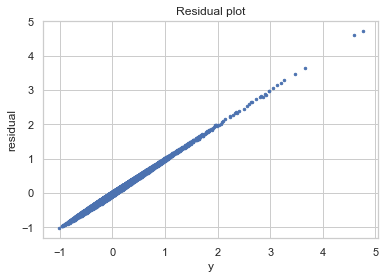

In [19]:
# plot residuals
plt.scatter(y_train, residuals, s=6);
plt.title('Residual plot');
plt.xlabel('y');
plt.ylabel('residual');
# predictions are near 0
# ys have a broad spread
# it's almost like plotting y vs. y

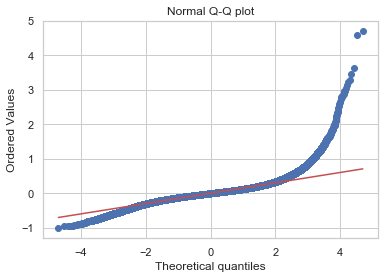

In [20]:
# q-q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

# large outliers


R-squared: 0.005764


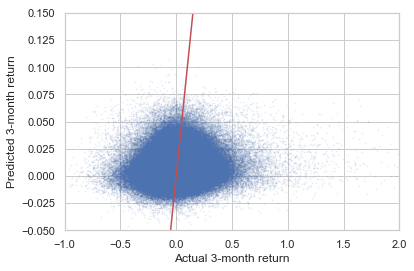

In [21]:
# Fitted vs. Actual
y_train_pred = results.predict(X_train_scaled_const)
print ("R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.ylim(-0.05, 0.15) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-0.05, 0.15])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [22]:
# test R-squared 
y_test_pred = results.predict(X_test_scaled_const)
print ("R-squared: %0.6f" % sklearn.metrics.r2_score(y_test, y_test_pred))


R-squared: 0.004318


In [23]:
# this result is not indicative of overfitting 
# test performance is not worse than training
# but in the interest of science we cross-validate lasso
# also if rows are not independent, test rows are similar to training rows
# rows are not independent
# - target is a 3-month moving window return
# - momentum is an 11-month moving window
# - value does not change month to month, econ indicators trend
# so 'test' may not be meaningful

In [24]:
# create CV folds 
kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)


In [25]:
# do same with sklearn instead of statsmodels
model = LinearRegression()

scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring="r2")
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the model
model.fit(X_train_scaled, y_train)

[0.0056444  0.00514578 0.00549276 0.00557495 0.00573118]
Linear Reg Mean Score:  0.005517815048837482


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R-squared: 0.005764


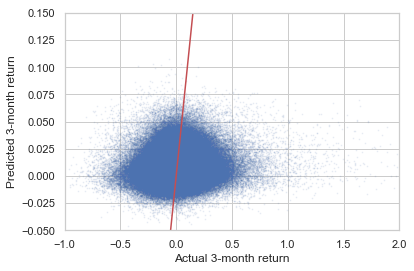

In [26]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train_scaled)
print ("R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

plt.ylim(-0.05, 0.15) 
plt.xlim(-1, 2) 
fortyfiveline = np.array([-0.05, 0.15])

plt.plot(fortyfiveline, fortyfiveline, c='r')
plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual 3-month return");
plt.ylabel("Predicted 3-month return");

In [27]:
# same result as statsmodels so that's good

In [28]:
def build_grid_search_est(model, X, y, params, cv=5):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv, scoring="r2")
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
#         plt.plot(np.log(df.alpha), df.mean_validation_score);
        plt.semilogx(df.alpha, df.mean_validation_score)
    return grid_est

In [29]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-6, 0, 13)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Lasso(), X_train_scaled, y_train, params, cv=kfold)
grid_est.grid_scores_

Lasso Model:
alphas to test
[1.00000000e-06 3.16227766e-06 1.00000000e-05 3.16227766e-05
 1.00000000e-04 3.16227766e-04 1.00000000e-03 3.16227766e-03
 1.00000000e-02 3.16227766e-02 1.00000000e-01 3.16227766e-01
 1.00000000e+00]


/Users/druce/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


KeyboardInterrupt: 

In [ ]:
grid_est.best_estimator_

R-squared: 0.005742


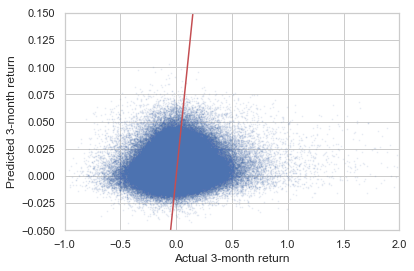

In [37]:
# rerun best estimator on full dataset

def run_one_model(model, X_train_scaled, y_train):

    # Build the model
    model.fit(X_train_scaled, y_train)

    # Evaluate
    y_train_pred = model.predict(X_train_scaled)
    print ("R-squared: %0.6f" % sklearn.metrics.r2_score(y_train, y_train_pred))

    plt.ylim(-0.05, 0.15) 
    plt.xlim(-1, 2) 
    fortyfiveline = np.array([-0.05, 0.15])

    plt.plot(fortyfiveline, fortyfiveline, c='r')
    plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
    plt.xlabel("Actual 3-month return");
    plt.ylabel("Predicted 3-month return");


run_one_model(Lasso(alpha=0.0001, random_state=random_state),
              X_train_scaled, y_train)


In [ ]:
print("Ridge Model:")
params = {
    "alpha": np.logspace(-6, 4, 21)
}

print("alphas to test")
print(params['alpha'])

grid_est = build_grid_search_est(Ridge(), X_train_scaled, y_train, params, cv=kfold)
grid_est.grid_scores_


In [ ]:
grid_est.best_estimator_
# do the best one on full train


In [ ]:
run_one_model(Ridge(alpha=3162.2776601683795, random_state=random_state),
              X_train_scaled, y_train)


In [ ]:
print("Elastic Net Grid Search")
params = {
    "alpha": np.logspace(-6, 6, 25),
    "l1_ratio": np.linspace(0.0, 1.0, 11)
}

print(params)

grid_est = build_grid_search_est(ElasticNet(), X_train_scaled, y_train, params, cv=kfold)


In [ ]:
grid_est.best_estimator_


In [ ]:
model = ElasticNet(alpha=1e-05, l1_ratio=6.309573444801933,
                   random_state=random_state)
                      
model.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = model.predict(X_train_scaled)
print(sklearn.metrics.r2_score(y_train, y_train_pred))

plt.scatter(y_train, y_train_pred, alpha=0.1, s=0.5);
plt.xlabel("Actual monthly return");
plt.ylabel("Predicted monthly return");

In [ ]:
# do statsmodels, plot issues
# so ultimately I want to fit RET against bm, momentum
# low r-squared, should I use 3 month RET to smooth
# bm - earnings vs. book
# enumerate models and run all
# blog post

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

model = sm.OLS(y_train,X_train_scaled)
fit = model.fit()
fit.summary()

In [34]:
import xgboost as xgb

print("XGBoost Hyperparameter tuning")
xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model,
                   {'max_depth': [5,6,7,8],
                    'n_estimators': [200,400],
                    'scale_pos_weight' : [1],
                    'learning_rate' : [0.01],  
                    'colsample_bytree' : [0.4],
                    'subsample' : [0.8],
                    'reg_alpha' : [0.3],
                    'gamma' : [10],
                   }
                  )

clf.fit(X_train_scaled,y_train)
print(clf.best_score_)
print(clf.best_params_)


XGBoost Hyperparameter tuning
0.00964979234631432
{'colsample_bytree': 0.4, 'gamma': 10, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 400, 'reg_alpha': 0.3, 'scale_pos_weight': 1, 'subsample': 0.8}


R-squared: 0.016228


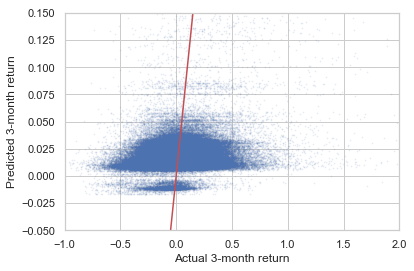

In [38]:
xgb_model = xgb.XGBRegressor(max_depth=8,
                             n_estimators=400,
                             scale_pos_weight = 1,
                             learning_rate = 0.01,  
                             colsample_bytree = 0.4,
                             subsample = 0.8,
                             reg_alpha = 0.3,
                             gamma= 10,
                            )


run_one_model(xgb_model,
              X_train_scaled, y_train)

